In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import statsmodels.api as sm
from scipy.stats import boxcox
from scipy.stats import scoreatpercentile as pct
from scipy.stats import iqr
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
pd.options.display.max_columns = 200

In [44]:
ica_df = pd.read_csv("Data_Marketing_Customer_Analysis_Round3.csv", index_col = 0)
ica_df

,region,customer_lifetime_value,response,coverage,education,effective_to_date,month,employment_status,gender,income,location_code,marital_status,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,central,4809,no,basic,college,2/18/11,feb,employed,m,48029,suburban,married,61,7,52,0,9,corporate auto,corporate l3,offer3,agent,292,four-door car,medsize
1,west region,2228,no,basic,college,1/18/11,jan,unemployed,f,26794,suburban,single,64,3,26,0,1,personal auto,personal l3,offer4,call center,744,four-door car,medsize
2,east,14947,no,basic,bachelor,2/10/11,feb,employed,m,22139,suburban,single,100,34,31,0,2,personal auto,personal l3,offer3,call center,480,suv,medsize
3,north west,22332,yes,extended,college,1/11/11,jan,employed,m,49078,suburban,single,97,10,3,0,2,corporate auto,corporate l3,offer2,branch,484,four-door car,medsize
4,north west,9025,no,premium,bachelor,1/17/11,jan,medical leave,f,23675,suburban,married,117,15,31,1,7,personal auto,personal l2,offer1,branch,707,four-door car,medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10684,central,15563,no,premium,bachelor,1/19/11,jan,unemployed,f,64811,suburban,married,253,8,40,2,7,personal auto,personal l1,offer3,web,1214,luxury car,medsize
10685,north west,5259,no,basic,college,1/6/11,jan,employed,f,61146,urban,married,65,7,68,0,6,personal auto,personal l3,offer2,branch,273,four-door car,medsize
10686,central,23893,no,extended,bachelor,2/6/11,feb,employed,f,39837,rural,married,201,11,63,0,2,corporate auto,corporate l3,offer1,web,381,luxury suv,medsize
10687,west region,11971,no,premium,college,2/13/11,feb,employed,f,64195,urban,divorced,158,0,27,4,6,personal auto,personal l1,offer1,branch,618,suv,medsize


In [45]:
categoricals_df = ica_df.select_dtypes('object')
categoricals_df

,region,response,coverage,education,effective_to_date,month,employment_status,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,central,no,basic,college,2/18/11,feb,employed,m,suburban,married,corporate auto,corporate l3,offer3,agent,four-door car,medsize
1,west region,no,basic,college,1/18/11,jan,unemployed,f,suburban,single,personal auto,personal l3,offer4,call center,four-door car,medsize
2,east,no,basic,bachelor,2/10/11,feb,employed,m,suburban,single,personal auto,personal l3,offer3,call center,suv,medsize
3,north west,yes,extended,college,1/11/11,jan,employed,m,suburban,single,corporate auto,corporate l3,offer2,branch,four-door car,medsize
4,north west,no,premium,bachelor,1/17/11,jan,medical leave,f,suburban,married,personal auto,personal l2,offer1,branch,four-door car,medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10684,central,no,premium,bachelor,1/19/11,jan,unemployed,f,suburban,married,personal auto,personal l1,offer3,web,luxury car,medsize
10685,north west,no,basic,college,1/6/11,jan,employed,f,urban,married,personal auto,personal l3,offer2,branch,four-door car,medsize
10686,central,no,extended,bachelor,2/6/11,feb,employed,f,rural,married,corporate auto,corporate l3,offer1,web,luxury suv,medsize
10687,west region,no,premium,college,2/13/11,feb,employed,f,urban,divorced,personal auto,personal l1,offer1,branch,suv,medsize


In [46]:
categoricals_df.education.unique()


array(['college', 'bachelor', 'high school or below', 'doctor', 'master'],
      dtype=object)

In [47]:
categoricals_df.policy.unique()

array(['corporate l3', 'personal l3', 'personal l2', 'corporate l2',
       'personal l1', 'special l1', 'corporate l1', 'special l3',
       'special l2'], dtype=object)

In [48]:
categoricals_df['policy'] = categoricals_df['policy'].replace({'corporate l3':'corporate', 
                                                               'corporate l2':'corporate',
                                                               'corporate l1': 'corporate',
                                                              "personal l3": "personal",
                                                              "personal l2": "personal",
                                                              "personal l1": "personal",
                                                              'special l1': 'special',
                                                              'special l2': 'special',
                                                              'special l3': 'special'})
categoricals_df.policy.unique()

array(['corporate', 'personal', 'special'], dtype=object)

In [49]:
categoricals_df.vehicle_class.value_counts()


four-door car    5416
two-door car     2193
suv              2109
sports car        564
luxury suv        214
luxury car        193
Name: vehicle_class, dtype: int64

In [50]:
categoricals_df['vehicle_class'] = categoricals_df['vehicle_class'].replace({'sports car':'luxury car', 
                                                               'luxury suv':'luxury car',})
categoricals_df.vehicle_class.value_counts()

four-door car    5416
two-door car     2193
suv              2109
luxury car        971
Name: vehicle_class, dtype: int64

#### One Hot encoding of categorical variables
#### categoricals=pd.get_dummies(categoricals, drop_first=True)

categoricals_df= pd.get_dummies(ica_df[["region","response", "coverage","education","effective_to_date","month", "employment_status",
                       "gender","location_code","marital_status", "policy_type", "policy","renew_offer_type", "sales_channel"
                      , "vehicle_class", "vehicle_size"]], drop_first=True)

In [51]:
categoricals_df= pd.get_dummies(categoricals_df, drop_first=True)
categoricals_df

,region_east,region_north west,region_west region,response_yes,coverage_extended,coverage_premium,education_college,education_doctor,education_high school or below,education_master,effective_to_date_1/10/11,effective_to_date_1/11/11,effective_to_date_1/12/11,effective_to_date_1/13/11,effective_to_date_1/14/11,effective_to_date_1/15/11,effective_to_date_1/16/11,effective_to_date_1/17/11,effective_to_date_1/18/11,effective_to_date_1/19/11,effective_to_date_1/2/11,effective_to_date_1/20/11,effective_to_date_1/21/11,effective_to_date_1/22/11,effective_to_date_1/23/11,effective_to_date_1/24/11,effective_to_date_1/25/11,effective_to_date_1/26/11,effective_to_date_1/27/11,effective_to_date_1/28/11,effective_to_date_1/29/11,effective_to_date_1/3/11,effective_to_date_1/30/11,effective_to_date_1/31/11,effective_to_date_1/4/11,effective_to_date_1/5/11,effective_to_date_1/6/11,effective_to_date_1/7/11,effective_to_date_1/8/11,effective_to_date_1/9/11,effective_to_date_2/1/11,effective_to_date_2/10/11,effective_to_date_2/11/11,effective_to_date_2/12/11,effective_to_date_2/13/11,effective_to_date_2/14/11,effective_to_date_2/15/11,effective_to_date_2/16/11,effective_to_date_2/17/11,effective_to_date_2/18/11,effective_to_date_2/19/11,effective_to_date_2/2/11,effective_to_date_2/20/11,effective_to_date_2/21/11,effective_to_date_2/22/11,effective_to_date_2/23/11,effective_to_date_2/24/11,effective_to_date_2/25/11,effective_to_date_2/26/11,effective_to_date_2/27/11,effective_to_date_2/28/11,effective_to_date_2/3/11,effective_to_date_2/4/11,effective_to_date_2/5/11,effective_to_date_2/6/11,effective_to_date_2/7/11,effective_to_date_2/8/11,effective_to_date_2/9/11,month_jan,employment_status_employed,employment_status_medical leave,employment_status_retired,employment_status_unemployed,gender_m,location_code_suburban,location_code_urban,marital_status_married,marital_status_single,policy_type_personal auto,policy_type_special auto,policy_personal,policy_special,renew_offer_type_offer2,renew_offer_type_offer3,renew_offer_type_offer4,sales_channel_branch,sales_channel_call center,sales_channel_web,vehicle_class_luxury car,vehicle_class_suv,vehicle_class_two-door car,vehicle_size_medsize,vehicle_size_small
0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,1,1,0,1,0,0,0,1,0,1,0,0,0,0,1,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,1,1,0,1,0,0,1,0,0,1,0,0,1,0,1,0
3,0,1,0,1,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0
4,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,1,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10684,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,1,0,1,0,1,0,0,1,0,0,0,1,1,0,0,1,0
10685,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,1,0,1,0,1,0,1,0,0,1,0,0,0,0,0,1,0
10686,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

In [52]:
numerical_df = ica_df._get_numeric_data()
numerical_df

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,4809,48029,61,7,52,0,9,292
1,2228,26794,64,3,26,0,1,744
2,14947,22139,100,34,31,0,2,480
3,22332,49078,97,10,3,0,2,484
4,9025,23675,117,15,31,1,7,707
...,...,...,...,...,...,...,...,...
10684,15563,64811,253,8,40,2,7,1214
10685,5259,61146,65,7,68,0,6,273
10686,23893,39837,201,11,63,0,2,381
10687,11971,64195,158,0,27,4,6,618


In [53]:
# X Y split
X = numerical_df.drop('total_claim_amount', axis=1)
y = numerical_df.total_claim_amount


In [54]:
X

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies
0,4809,48029,61,7,52,0,9
1,2228,26794,64,3,26,0,1
2,14947,22139,100,34,31,0,2
3,22332,49078,97,10,3,0,2
4,9025,23675,117,15,31,1,7
...,...,...,...,...,...,...,...
10684,15563,64811,253,8,40,2,7
10685,5259,61146,65,7,68,0,6
10686,23893,39837,201,11,63,0,2
10687,11971,64195,158,0,27,4,6


In [55]:
X = pd.concat([categoricals_df, X], axis = 1)


In [56]:
X

,region_east,region_north west,region_west region,response_yes,coverage_extended,coverage_premium,education_college,education_doctor,education_high school or below,education_master,effective_to_date_1/10/11,effective_to_date_1/11/11,effective_to_date_1/12/11,effective_to_date_1/13/11,effective_to_date_1/14/11,effective_to_date_1/15/11,effective_to_date_1/16/11,effective_to_date_1/17/11,effective_to_date_1/18/11,effective_to_date_1/19/11,effective_to_date_1/2/11,effective_to_date_1/20/11,effective_to_date_1/21/11,effective_to_date_1/22/11,effective_to_date_1/23/11,effective_to_date_1/24/11,effective_to_date_1/25/11,effective_to_date_1/26/11,effective_to_date_1/27/11,effective_to_date_1/28/11,effective_to_date_1/29/11,effective_to_date_1/3/11,effective_to_date_1/30/11,effective_to_date_1/31/11,effective_to_date_1/4/11,effective_to_date_1/5/11,effective_to_date_1/6/11,effective_to_date_1/7/11,effective_to_date_1/8/11,effective_to_date_1/9/11,effective_to_date_2/1/11,effective_to_date_2/10/11,effective_to_date_2/11/11,effective_to_date_2/12/11,effective_to_date_2/13/11,effective_to_date_2/14/11,effective_to_date_2/15/11,effective_to_date_2/16/11,effective_to_date_2/17/11,effective_to_date_2/18/11,effective_to_date_2/19/11,effective_to_date_2/2/11,effective_to_date_2/20/11,effective_to_date_2/21/11,effective_to_date_2/22/11,effective_to_date_2/23/11,effective_to_date_2/24/11,effective_to_date_2/25/11,effective_to_date_2/26/11,effective_to_date_2/27/11,effective_to_date_2/28/11,effective_to_date_2/3/11,effective_to_date_2/4/11,effective_to_date_2/5/11,effective_to_date_2/6/11,effective_to_date_2/7/11,effective_to_date_2/8/11,effective_to_date_2/9/11,month_jan,employment_status_employed,employment_status_medical leave,employment_status_retired,employment_status_unemployed,gender_m,location_code_suburban,location_code_urban,marital_status_married,marital_status_single,policy_type_personal auto,policy_type_special auto,policy_personal,policy_special,renew_offer_type_offer2,renew_offer_type_offer3,renew_offer_type_offer4,sales_channel_branch,sales_channel_call center,sales_channel_web,vehicle_class_luxury car,vehicle_class_suv,vehicle_class_two-door car,vehicle_size_medsize,vehicle_size_small,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies
0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,4809,48029,61,7,52,0,9
1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,1,1,0,1,0,0,0,1,0,1,0,0,0,0,1,0,2228,26794,64,3,26,0,1
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,1,1,0,1,0,0,1,0,0,1,0,0,1,0,1,0,14947,22139,100,34,31,0,2
3,0,1,0,1,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,22332,49078,97,10,3,0,2
4,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,1,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,9025,23675,117,15,31,1,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10684,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,1,0,

In [61]:
# Train-test split.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.30,random_state=123)

In [62]:
#Standardize the data.
std_scaler = StandardScaler().fit(X_train)   
X_train_scaled = std_scaler.transform(X_train)

In [65]:
X_test_scaled=std_scaler.transform(X_test)

In [66]:
X_train.shape

(7482, 100)

In [67]:
#Model fitting
model=LinearRegression()    # model
model.fit(X_train_scaled, y_train)   # model train

LinearRegression()

In [68]:
print("coef ", model.coef_)
print("intercept:", model.intercept_)

coef  [ 2.97227146e+00 -3.90767179e-02  4.08741283e+00 -9.18279033e+00
 -7.62253884e+00 -7.09888940e+00 -4.06499014e+00 -4.07448547e+00
  2.20641709e+00 -3.38251055e+00 -1.20105979e+00 -1.66480314e+00
 -9.22421413e-01  3.37388393e+00 -1.48195034e+00 -6.84532185e-01
 -1.73637419e+00 -1.02196330e+00 -2.07548751e+00 -1.83813024e+00
  1.30825727e+00  9.00216625e-01 -1.90392967e+00  3.13331451e-01
 -2.56291962e+00 -3.61612305e+00 -1.09054008e+00  2.08497021e+00
  5.63228521e-01 -9.73881151e-01  2.28085574e+00  1.02101017e+00
 -1.99875528e+00 -3.62525003e+00 -5.40721698e-01  2.00266634e-01
  1.64979931e-02 -2.98524324e+00 -7.48759403e-01 -3.27212265e+00
  6.21666305e+14  6.33203615e+14  6.46756306e+14  6.21666305e+14
  5.62757603e+14  6.57820186e+14  5.54925222e+14  5.97873857e+14
  5.46974096e+14  5.90535980e+14  6.33203615e+14  6.12268151e+14
  5.62757603e+14  6.12268151e+14  6.23992119e+14  5.80598225e+14
  5.78085358e+14  6.33203615e+14  6.28616017e+14  6.28616017e+14
  6.35484048e+14  6

In [70]:
#Making prediction
y_pred = model.predict(X_test_scaled)   # model prediction

y_pred_train = model.predict(X_train_scaled)

In [71]:
y_test

4665     345
4072     345
4549     257
4211     445
3081     523
        ... 
3488     404
1667     554
1516     350
10215     27
2931     320
Name: total_claim_amount, Length: 3207, dtype: int64

In [72]:
y_pred

array([456.31874733, 396.3234607 , 137.60409336, ..., 577.50975378,
       -36.06447499, 471.82435582])

In [73]:
result=pd.DataFrame({"y_test":y_test,"y_pred":y_pred})
result

,y_test,y_pred
4665,345,456.318747
4072,345,396.323461
4549,257,137.604093
4211,445,409.903629
3081,523,440.649442
...,...,...
3488,404,346.587719
1667,554,513.508583
1516,350,577.509754
10215,27,-36.064475


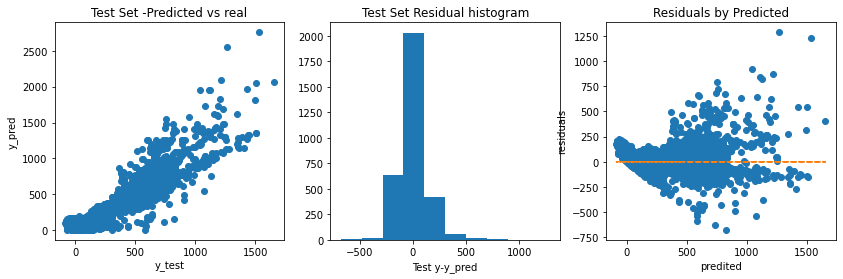

In [74]:

fig, ax = plt.subplots(1,3,figsize=(14,4))
ax[0].plot(y_pred, y_test, 'o')
ax[0].set_xlabel("y_test")
ax[0].set_ylabel("y_pred")
ax[0].set_title("Test Set -Predicted vs real")


ax[1].hist(y_test - y_pred)
ax[1].set_xlabel("Test y-y_pred")
ax[1].set_title("Test Set Residual histogram")

ax[2].plot(y_pred,y_test - y_pred,"o")
ax[2].set_xlabel("predited")
ax[2].set_ylabel("residuals")
ax[2].set_title("Residuals by Predicted")
ax[2].plot(y_pred,np.zeros(len(y_pred)),linestyle='dashed')

In [75]:
print(mse(y_test,y_pred))
print(mae(y_test,y_pred))
print(np.sqrt(mse(y_test,y_pred)))

19206.68889557681
95.92128995972823
138.58819897659689


In [76]:
##prediction on the train set
mse(y_train,y_pred_train)


19707.7874483868

In [77]:
R2=r2_score(y_test,y_pred)
R2

0.769745450184881

In [78]:
R2_test=model.score(X_test_scaled,y_test)
R2_train=model.score(X_train_scaled,y_train)
print(R2_test)
print(R2_train)

0.769745450184881
0.7721658433366461


In [79]:
Adj_R2= 1 - (1-R2)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
Adj_R2

0.7623322322256049

In [83]:
features_importances = pd.DataFrame(data={
    'Attribute': X_train.columns,
    'Importance': abs(model.coef_)
})
features_importances = features_importances.sort_values(by='Importance', ascending=False)

In [84]:
features_importances

,Attribute,Importance
68,month_jan,2.365528e+15
45,effective_to_date_2/14/11,6.578202e+14
62,effective_to_date_2/4/11,6.556236e+14
42,effective_to_date_2/11/11,6.467563e+14
61,effective_to_date_2/3/11,6.422730e+14
...,...,...
71,employment_status_retired,2.728309e-01
90,vehicle_class_two-door car,2.302477e-01
35,effective_to_date_1/5/11,2.002666e-01
1,region_north west,3.907672e-02
